In [1]:
!sudo pip3 install -U spacy

     |████████████████████████████████| 6.0 MB 5.3 MB/s 
     |████████████████████████████████| 10.1 MB 30.3 MB/s 
     |████████████████████████████████| 451 kB 50.1 MB/s 
     |████████████████████████████████| 42 kB 654 kB/s 
     |████████████████████████████████| 181 kB 43.7 MB/s 
     |████████████████████████████████| 653 kB 40.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 569.1 MB 18 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [3]:
# IMPORTS
import spacy
import scipy
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [4]:
# Load the Drive helper and mount
drive.mount('/content/drive')
sst_home='drive/My Drive/NLP GRUPO/'

Mounted at /content/drive


Positivos = 1501
Negativos = 6100
----------------------------


([<matplotlib.patches.Wedge at 0x7f86d72151d0>,
 [Text(-0.8950215254763844, 0.6394814062456594, 'Negative'),
  Text(0.8950215554126681, -0.6394813643466777, 'Positive')])

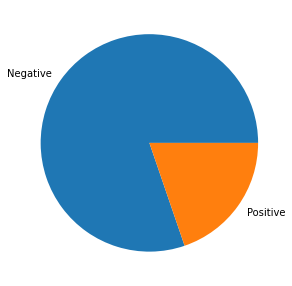

In [5]:
data = pd.read_csv(sst_home+"/PARMEX_2022-main/parmex_train.csv") # 7601

text_1_df = data["Text1"]
text_2_df = data["Text2"]
label_df = data["Label"]

print("Positivos =", len(data[data["Label"] == 1]))
print("Negativos =", len(data[data["Label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(data[data["Label"] == 0]), len(data[data["Label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [6]:
nlp = spacy.load("es_core_news_lg")

In [7]:
tokens_1=[]
tokens_2=[]
for i, text in text_1_df.items(): 
    tok_1 = nlp(text)
    tok_2 = nlp(text_2_df[i])
    tokens_1.append(tok_1.vector)
    tokens_2.append(tok_2.vector)

print(len(tokens_1), len(tokens_2), len(label_df))

7601 7601 7601


In [8]:
text_df = pd.DataFrame()

text_df["text1"] = tokens_1
text_df["text2"] = tokens_2

In [9]:
text_df.head()

,text1,text2
0,"[1.1980089, 0.90301096, 0.5791257, -0.2930767,...","[0.8029042, 1.3321735, 0.05703935, -0.14258406..."
1,"[1.9734595, 0.21670905, 1.0547999, -0.835712, ...","[1.1579125, 1.3511047, 0.29660335, 0.19542065,..."
2,"[0.9243971, 0.56616414, 1.61111, -0.41463804, ...","[0.3347235, 0.5194913, 0.32327643, 0.79137117,..."
3,"[1.1605389, 1.0551865, 0.20018128, 0.097293876...","[1.2090905, 1.2434653, 0.3518865, 0.8834865, 2..."
4,"[1.310756, 0.3022454, 0.49290326, -0.35534763,...","[1.179389, 0.7862297, -0.09335905, -0.66790867..."


[(0, 6100), (1, 6100)]
Negatives =  6100
Positives =  6100
--------------------------


([<matplotlib.patches.Wedge at 0x7f86cfaf65d0>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-2.0206672185931328e-16, -1.1, 'Positive')])

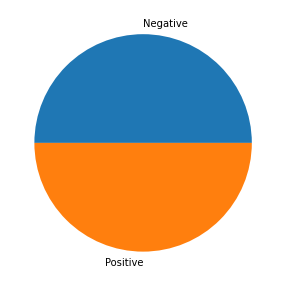

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(text_df, label_df)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
print("Negatives = ", len(y_resampled[y_resampled == 0]))
print("Positives = ", len(y_resampled[y_resampled == 1]))
print("--------------------------")
fig = plt.figure(figsize =(5, 5))
plot_data = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [11]:
def cosine_distance_wordembedding(s1, s2):
    """gets two texts, obtains their word embeddings and then returns its cosine distance"""

    cosine = 1 - scipy.spatial.distance.cosine(s1, s2)
    #print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((cosine)*100,2),'%')
    return round((cosine),2)

In [12]:
# utilizar todo el conjunto de datos 

predicted = []

for i, text1 in X_resampled["text1"].items():
  text2 = X_resampled["text2"][i]
  pred = cosine_distance_wordembedding(text1, text2)
  if pred < 0.88:
    predicted.append(0)
  else:
    predicted.append(1)

In [13]:
pos = 0
for i in predicted:
  if i == 1:
    pos+=1

print(pos)

4915


In [14]:
predicted_series = pd.Series(predicted)

precision_recall_fscore_support(y_resampled, predicted_series, average=None)

(array([0.66671242, 0.74710071]),
 array([0.79622951, 0.60196721]),
 array([0.72573777, 0.66672719]),
 array([6100, 6100]))

In [15]:
print( classification_report(y_resampled, predicted_series))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      6100
           1       0.75      0.60      0.67      6100

    accuracy                           0.70     12200
   macro avg       0.71      0.70      0.70     12200
weighted avg       0.71      0.70      0.70     12200



Text(0.5, 0, 'predicted label')

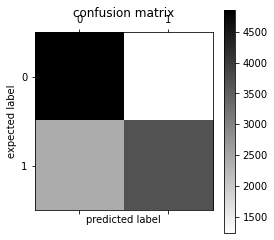

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

plt.matshow(confusion_matrix(y_resampled, predicted_series), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')



In [17]:
labels = ['negative', 'positive']

pd.DataFrame(confusion_matrix(y_resampled, predicted_series), index=labels, columns=labels)

,negative,positive
negative,4857,1243
positive,2428,3672
